In [1]:
from plotly.offline import download_plotlyjs , init_notebook_mode,plot ,iplot
import plotly.graph_objs as go
import pandas as pd

In [2]:
init_notebook_mode(connected=True)

In [3]:
pubg = pd.read_csv('PUBG.csv')

In [4]:
pubg.describe

<bound method NDFrame.describe of             player_name  tracker_id  solo_KillDeathRatio  solo_WinRatio  \
0             BreakNeck        4405                 3.14          17.65   
1             Blackwalk        8199                 4.41          18.18   
2         mercedes_benz        4454                 3.60           0.00   
3                  DORA        7729                14.00          50.00   
4               n2tstar           0                10.50          33.33   
5            coldoxygen       33313                 5.73          31.25   
6                 Giken       15585                 2.45           8.45   
7              KoreaNo1        9454                 2.71          26.32   
8                 undor       24029                 3.68          13.64   
9               Fordune       11289                 4.17          25.00   
10        PandaTV-Tongk      142394                 3.12           6.03   
11             Benny-_-       16256                 1.20          

In [5]:
pubg.head()

player_name  tracker_id  solo_KillDeathRatio  solo_WinRatio  \
0      BreakNeck        4405                 3.14          17.65   
1      Blackwalk        8199                 4.41          18.18   
2  mercedes_benz        4454                 3.60           0.00   
3           DORA        7729                14.00          50.00   
4        n2tstar           0                10.50          33.33   

   solo_TimeSurvived  solo_RoundsPlayed  solo_Wins  solo_WinTop10Ratio  \
0           18469.14                 17          3                0.83   
1           33014.86                 33          6                0.36   
2            4330.44                  5          0                0.00   
3           13421.82                  8          4                0.67   
4            9841.04                  6          2                0.40   

   solo_Top10s  solo_Top10Ratio  ...  squad_RideDistance  squad_MoveDistance  \
0            4             23.5  ...          3751590.99          5194786.58   
1           11             33.3  ...          4295917.30          6051783.67   
2            1             20.0  ...          3935265.63          5589608.74   
3            6             75.0  ...          2738998.00          3796916.00   
4            5             83.3  ...          2347295.00          3220260.00   

   squad_AvgWalkDistance  squad_AvgRideDistance  squad_LongestKill  \
0                2626.97                4372.64             536.98   
1                2422.48                6009.73             734.85   
2                1871.89                3011.87             725.44   
3                2154.62                5578.41             587.28   
4                2098.47                5642.54             546.10   

   squad_Heals  squad_Revives  squad_Boosts  squad_DamageDealt  squad_DBNOs  
0         2186            234          1884          242132.73         1448  
1         2041            276          2340          269795.75         1724  
2         1766            210          2193          292977.07         1897  
3         1214            142          1252          181106.90         1057  
4         1245            120           923          160029.80         1077  

[5 rows x 152 columns]

In [6]:
pubg.shape

(87898, 152)

In [7]:
pubg.columns

Index(['player_name', 'tracker_id', 'solo_KillDeathRatio', 'solo_WinRatio',
       'solo_TimeSurvived', 'solo_RoundsPlayed', 'solo_Wins',
       'solo_WinTop10Ratio', 'solo_Top10s', 'solo_Top10Ratio',
       ...
       'squad_RideDistance', 'squad_MoveDistance', 'squad_AvgWalkDistance',
       'squad_AvgRideDistance', 'squad_LongestKill', 'squad_Heals',
       'squad_Revives', 'squad_Boosts', 'squad_DamageDealt', 'squad_DBNOs'],
      dtype='object', length=152)

In [8]:
pubg.isna().sum()

player_name                  0
tracker_id                   0
solo_KillDeathRatio          0
solo_WinRatio                0
solo_TimeSurvived            0
solo_RoundsPlayed            0
solo_Wins                    0
solo_WinTop10Ratio           0
solo_Top10s                  0
solo_Top10Ratio              0
solo_Losses                  0
solo_Rating                  0
solo_BestRating              0
solo_DamagePg                0
solo_HeadshotKillsPg         0
solo_HealsPg                 0
solo_KillsPg                 0
solo_MoveDistancePg          0
solo_RevivesPg               0
solo_RoadKillsPg             0
solo_TeamKillsPg             0
solo_TimeSurvivedPg          0
solo_Top10sPg                0
solo_Kills                   0
solo_Assists                 0
solo_Suicides                0
solo_TeamKills               0
solo_HeadshotKills           0
solo_HeadshotKillRatio       0
solo_VehicleDestroys         0
                            ..
squad_Top10sPg               0
squad_Ki

In [9]:
df_pubg = pubg.apply(pd.to_numeric,errors='ignore')

In [10]:
df_pubg_v2 = df_pubg.head(300)

In [11]:
df_pubg_v2.shape

(300, 152)

In [33]:
trace = go.Scatter(x= df_pubg_v2.solo_Wins , y= df_pubg_v2.solo_TimeSurvived,name = 'Round Won' , mode = 'markers')

In [34]:
data = [trace]

In [35]:
iplot(data)

In [15]:
layout = go.Layout(title ='PUBG win vs round' ,plot_bgcolor='rgb(230,230,230)' , showlegend=True)

In [16]:
fig = go.Figure(data=[trace],layout=layout)

In [17]:
iplot(fig)

In [18]:
df_pubg_v3 = df_pubg.head(15)

In [19]:
trace1 = go.Bar(x = df_pubg_v3.player_name , y= df_pubg_v3.solo_RoundsPlayed,name ='Rounds Played')
trace2 = go.Bar(x = df_pubg_v3.player_name , y= df_pubg_v3.solo_Wins,name ='Rounds Won')

In [20]:
fig = go.Figure(data=[trace1,trace2],layout=layout)

In [21]:
iplot(fig)

In [62]:
df_pubg_v4 = df_pubg.head(5000)

In [63]:
import plotly.figure_factory as ff

In [64]:
x = df_pubg_v4.solo_Wins
y = df_pubg_v4.solo_TimeSurvived

In [65]:
fig  =ff.create_2d_density(x ,y )

In [66]:
iplot(fig)

In [72]:
df_new_pubg = df_pubg.head(100)

In [73]:
x =df_new_pubg.solo_Wins
y = df_new_pubg.solo_TimeSurvived
z = df_new_pubg.solo_RoundsPlayed

In [76]:
trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z    ,
    mode='markers',
    marker=dict(
    
    size=12,
        color = z,
        colorscale='Viridis',
        opacity=0.8 ,showscale=True
    )
)

In [77]:
data =[trace1]
iplot(data)

In [78]:
layout = go.Layout(margin=dict(

l=0,
    r=0,
    t=0,
    b=0

))

In [79]:
fig = go.Figure(data=data , layout=layout)
iplot(fig,filename='3d')

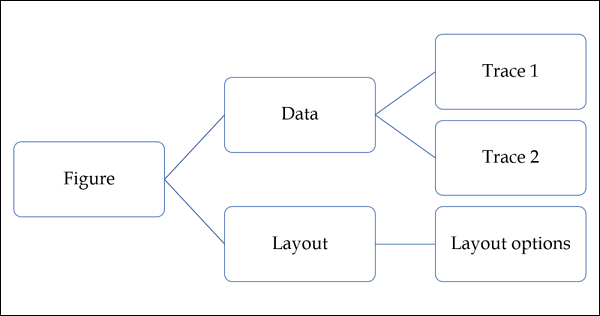

In [80]:
from IPython.display import Image
Image(filename='howto.jpg')

In [81]:
!pip install chart_studio

In [82]:
import chart_studio
apikey='qq7sRQsOutIOOfbY2uRy'
chart_studio.tools.set_credentials_file(username='mars.wang8022',api_key=apikey)


In [83]:
init_notebook_mode(connected=True)
import chart_studio.plotly as py

In [84]:
fig = go.Figure(data=data , layout=layout)
py.iplot(fig,filename='3dtest')